In [ ]:
import time

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data as data

In [ ]:
print("Using torch", torch.__version__)

Using torch 1.10.0+cu111


In [ ]:
print(f"Is the GPU available? {torch.cuda.is_available()}")

Is the GPU available? False


In [ ]:
class LiteNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(2, 4)
        self.act1 = nn.LeakyReLU()
        self.linear2 = nn.Linear(4, 2)
        self.act2 = nn.LeakyReLU()
        self.linear3 = nn.Linear(2, 1)

    def forward(self, x):
        x = self.linear1(x)
        x = self.act1(x)
        x = self.linear2(x)
        x = self.act2(x)
        x = self.linear3(x)
        return x

In [ ]:
model = LiteNN()
print(model)
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

LiteNN(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act1): LeakyReLU(negative_slope=0.01)
  (linear2): Linear(in_features=4, out_features=2, bias=True)
  (act2): LeakyReLU(negative_slope=0.01)
  (linear3): Linear(in_features=2, out_features=1, bias=True)
)
Parameter linear1.weight, shape torch.Size([4, 2])
Parameter linear1.bias, shape torch.Size([4])
Parameter linear2.weight, shape torch.Size([2, 4])
Parameter linear2.bias, shape torch.Size([2])
Parameter linear3.weight, shape torch.Size([1, 2])
Parameter linear3.bias, shape torch.Size([1])


In [ ]:
class XORDataset(data.Dataset):
    def __init__(self, size, std=0.1):
        super().__init__()
        self.size = size
        self.std = std
        self.generate_continuous_xor()

    def generate_continuous_xor(self):
        data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) == 1).to(torch.long)
        data += self.std * torch.randn(data.shape)

        self.data = data
        self.label = label

    def __len__(self):
        return self.size

    def __getitem__(self, idx):
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

In [ ]:
train_dataset = XORDataset(size=1024, std=0.3)
print("Size of dataset:", len(dataset))
print("Number of zeros:", len([l for l in dataset.label if l == 0]))
print("Number of ones:", len([l for l in dataset.label if l == 1]))
i = 0

Size of dataset: 1024
Number of zeros: 506
Number of ones: 518


In [ ]:
print("Data point", str(i) + ":", dataset[i])
i += 1

Data point 0: (tensor([-0.2894, -0.0066]), tensor(0))


In [ ]:
def visualize_samples(data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4, 4))
    plt.scatter(data_0[:, 0], data_0[:, 1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:, 0], data_1[:, 1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

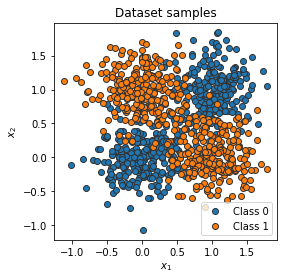

In [ ]:
visualize_samples(dataset.data, dataset.label)
plt.show()

In [ ]:
train_data_loader = data.DataLoader(dataset, batch_size=128, shuffle=True)

In [ ]:
data_inputs, data_labels = next(iter(data_loader))

print("Data inputs", data_inputs.shape)
print("Data labels", data_labels.shape)

Data inputs torch.Size([16, 2]) 
 tensor([[ 0.8465,  0.8299],
        [ 0.8170, -0.0286],
        [ 0.7264,  0.3938],
        [-0.3332,  1.3751],
        [-0.2038, -0.2126],
        [ 1.2624,  0.1439],
        [-0.3479, -0.1147],
        [ 1.2250,  1.0366],
        [ 0.5788,  1.0370],
        [ 0.3694, -0.4413],
        [ 1.1147,  0.1449],
        [ 0.2452,  0.0735],
        [ 0.6279,  0.8443],
        [-0.2442,  0.2357],
        [ 0.1435,  1.1767],
        [-0.2264,  0.0117]])
Data labels torch.Size([16]) 
 tensor([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0])


In [ ]:
learning_rate = 0.01
loss_module = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)